In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import io

In [2]:
df_blob=pd.read_csv('blob_data_COMPLETE.csv',index_col=0)

In [3]:
df_fcm=pd.read_csv('fcm_data_split.csv',index_col=0)

In [4]:
cols_to_use = df_fcm.columns.difference(df_blob.columns)
cols_to_use=cols_to_use.union(['Animal ID','Sequence ID'])
df=pd.merge(df_blob,df_fcm[cols_to_use],how='inner',on=['Animal ID','Sequence ID'])

In [5]:
col_out = ['Sex', 'Sequence ID', 'File Path']
df=df.drop(columns=col_out)
df=df.replace([np.inf, -np.inf], np.nan)
df=df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [6]:
#df=df.select_dtypes([np.number])
#df.fillna(0, inplace=True)

In [7]:
ids = list(set(np.array(df.loc[:, 'Animal ID'])))
train_ids, test_ids = train_test_split(ids, shuffle=True, random_state=9999, test_size=0.3, train_size=0.7)
#training_ids, validation_ids = train_test_split(t_and_v, shuffle=True, test_size=0.14, train_size=0.86)

df_training = df.loc[df['Animal ID'].isin(train_ids)].drop(columns=['Animal ID'])
df_testing = df.loc[df['Animal ID'].isin(test_ids)].drop(columns=['Animal ID'])
#df_testing = df.loc[df['Animal ID'].isin(test_ids)].drop(columns=col_out)

In [8]:
df_training=df_training.apply(lambda x: x.fillna(x.mean()),axis=0)
df_testing=df_testing.apply(lambda x: x.fillna(x.mean()),axis=0)

In [9]:
y_train=df_training['Age']
y_test=df_testing['Age']
#y_test=df_testing['Age']

In [10]:
X_train=df_training.drop('Age',1)
X_test=df_testing.drop('Age',1)
#X_test=df_testing.drop('Age',1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_test = scaler.fit_transform(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on validation set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.87
Accuracy of Logistic regression classifier on validation set: 0.59


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on validation set: 0.77


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on validation set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on validation set: 0.61


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on validation set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on validation set: 0.83


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on validation set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.87
Accuracy of GNB classifier on validation set: 0.52


In [17]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on validation set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.77
Accuracy of SVM classifier on validation set: 0.67


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
rf.fit(X_train, y_train)  
print('Accuracy of Random Forrest classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of Random Forrest classifier on validation set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of Random Forrest classifier on training set: 0.77
Accuracy of Random Forrest classifier on validation set: 0.67


In [26]:
importance=dict(zip(df_training.drop(columns=['Age']).columns, clf.feature_importances_))

import operator
sorted(importance.items(), key=operator.itemgetter(1))


[('bbox_area', 0.0),
 ('convex_area', 0.0),
 ('eccentricity', 0.0),
 ('equivalent_diameter', 0.0),
 ('euler_number', 0.0),
 ('filled_area', 0.0),
 ('major_axis_length', 0.0),
 ('max_intensity', 0.0),
 ('mean_intensity', 0.0),
 ('minor_axis_length', 0.0),
 ('perimeter', 0.0),
 ('contrast', 0.0),
 ('energy', 0.0),
 ('correlation', 0.0),
 ('dissimilarity', 0.0),
 ('Region Count', 0.0),
 ('Average Area', 0.0),
 ('Avg Compactness', 0.0),
 ('Non-circular blobs', 0.0),
 ('Texture Feature - Avg Energy', 0.0),
 ('min_intensity', 0.003731568427893637),
 ('Number of nucleii', 0.003834612448690375),
 ('Circular blobs', 0.0059436492954700855),
 ('extent', 0.01567191639693574),
 ('orientation', 0.019652086441413745),
 ('homogeneity', 0.027006411807726647),
 ('area', 0.049926654081948726),
 ('Number of overlapping nucleii', 0.07991444915376068),
 ('Texture feature - Avg Homogenity', 0.10761691642442203),
 ('solidity', 0.13025337830536476),
 ('Texture feature - Avg Correlation', 0.5564483572163735)]

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0   0   0   0]
 [ 25  75   0   0]
 [  0   0  50   0]
 [ 37   7   0 106]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           6       0.91      0.75      0.82       100
          16       1.00      1.00      1.00        50
          24       1.00      0.71      0.83       150

   micro avg       0.77      0.77      0.77       300
   macro avg       0.73      0.61      0.66       300
weighted avg       0.97      0.77      0.86       300



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [21]:
df['Age_group']=df.Age.astype('str')
df['Nucleii Overlap (log)']=np.log10(df['Number of overlapping nucleii'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


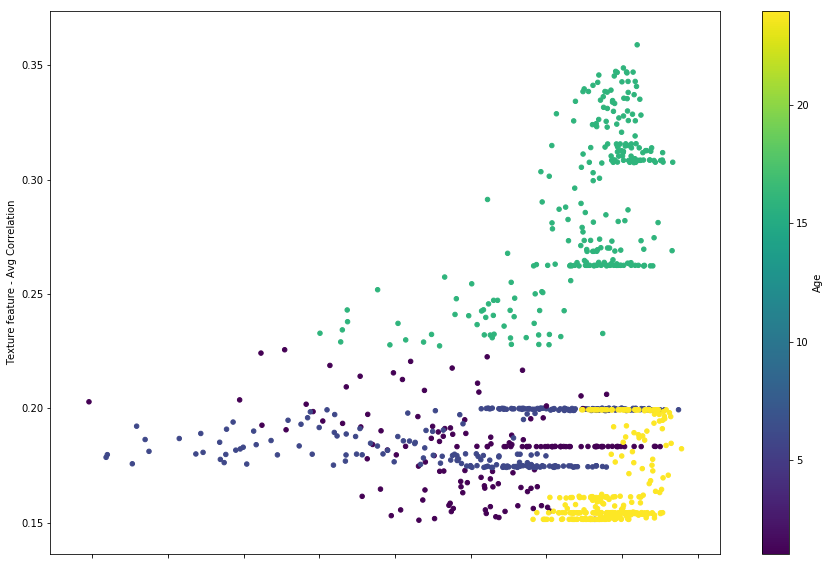

In [27]:
df[['solidity','Texture feature - Avg Correlation','Age']].plot.scatter(0,1,c='Age',colormap='viridis',figsize=(15,10))

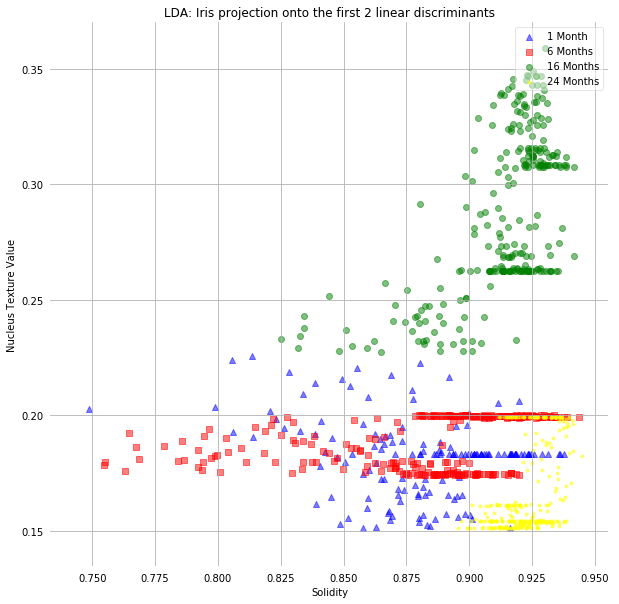

In [29]:
perimeter=df['solidity']
texture=df['Texture feature - Avg Correlation']
age=df['Age']

from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

label_dict = {1: '1 Month', 6: '6 Months', 16:'16 Months', 24:'24 Months'}
ax = plt.subplot(111)
for label,marker,color in zip(
    [1,6,16,24],('^', 's', 'o','.'),('blue', 'red', 'green','yellow')):

    plt.scatter(x=perimeter.real[age == label],
            y=texture.real[age == label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

plt.xlabel('Solidity')
plt.ylabel('Nucleus Texture Value')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('LDA: Iris projection onto the first 2 linear discriminants')

# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on")

# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    


plt.grid()
plt.tight_layout
plt.show()



Automatically created module for IPython interactive environment


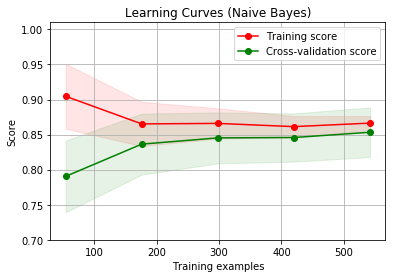

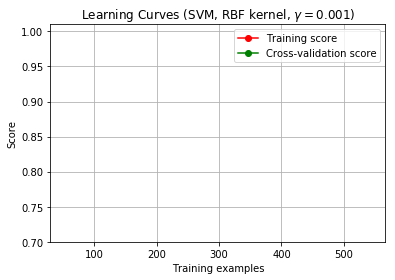

In [24]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = X_train, y_train


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()